In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns
from sklearn.linear_model import LinearRegression

# Importovanie dat

In [2]:
data = pd.read_csv('nyc_squirrel.csv')

In [3]:
print(data.shape)
data.head().T

(3023, 36)


,0,1,2,3,4
long,-73.956134,-73.957044,-73.976831,-73.975725,-73.959313
lat,40.794082,40.794851,40.766718,40.769703,40.797533
unique_squirrel_id,37F-PM-1014-03,37E-PM-1006-03,2E-AM-1010-03,5D-PM-1018-05,39B-AM-1018-01
hectare,37F,37E,02E,05D,39B
shift,PM,PM,AM,PM,AM
date,10142018,10062018,10102018,10182018,10182018
hectare_squirrel_number,3,3,3,5,1
age,NaN,Adult,Adult,Juvenile,NaN
primary_fur_color,NaN,Gray,Cinnamon,Gray,NaN
highlight_fur_color,NaN,Cinnamon,NaN,NaN,NaN


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3023 entries, 0 to 3022
Data columns (total 36 columns):
 #   Column                                      Non-Null Count  Dtype  
---  ------                                      --------------  -----  
 0   long                                        3023 non-null   float64
 1   lat                                         3023 non-null   float64
 2   unique_squirrel_id                          3023 non-null   object 
 3   hectare                                     3023 non-null   object 
 4   shift                                       3023 non-null   object 
 5   date                                        3023 non-null   int64  
 6   hectare_squirrel_number                     3023 non-null   int64  
 7   age                                         2902 non-null   object 
 8   primary_fur_color                           2968 non-null   object 
 9   highlight_fur_color                         1937 non-null   object 
 10  combination_

In [5]:
df = data[['long','lat','unique_squirrel_id','shift','date','age','primary_fur_color','highlight_fur_color','location','above_ground_sighter_measurement']]

In [6]:
df['date'] = pd.to_datetime(data['date'],format="%m%d%Y")

<ipython-input-6-52ff0c1e54dd>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['date'] = pd.to_datetime(data['date'],format="%m%d%Y")


In [7]:
df['above_ground_sighter_measurement'] = df['above_ground_sighter_measurement'].replace("FALSE",np.nan).astype('float')

<ipython-input-7-6127f34891a6>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['above_ground_sighter_measurement'] = df['above_ground_sighter_measurement'].replace("FALSE",np.nan).astype('float')


In [8]:
df['did_activity'] = np.any(data[['running','chasing','climbing','eating','foraging']],axis=1)
df['did_interaction'] = np.any(data[['kuks','quaas','moans','tail_flags','tail_twitches','approaches','runs_from']],axis=1)

<ipython-input-8-1f7b25244f03>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['did_activity'] = np.any(data[['running','chasing','climbing','eating','foraging']],axis=1)
<ipython-input-8-1f7b25244f03>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['did_interaction'] = np.any(data[['kuks','quaas','moans','tail_flags','tail_twitches','approaches','runs_from']],axis=1)


# EDA 

In [9]:
df['unique_squirrel_id'].value_counts().head(6)

40B-AM-1019-06    2
1F-AM-1010-04     2
37E-PM-1006-03    2
7D-PM-1010-01     2
4C-PM-1010-05     2
4G-AM-1006-03     1
Name: unique_squirrel_id, dtype: int64

In [10]:
df['above_ground_sighter_measurement'].describe()

count    793.000000
mean      15.210593
std       15.502925
min        0.000000
25%        5.000000
50%       10.000000
75%       20.000000
max      180.000000
Name: above_ground_sighter_measurement, dtype: float64

In [11]:
l=['shift','age','primary_fur_color','highlight_fur_color','location','above_ground_sighter_measurement','did_activity','did_interaction']

In [12]:
df['age'].value_counts()

Adult       2568
Juvenile     330
?              4
Name: age, dtype: int64

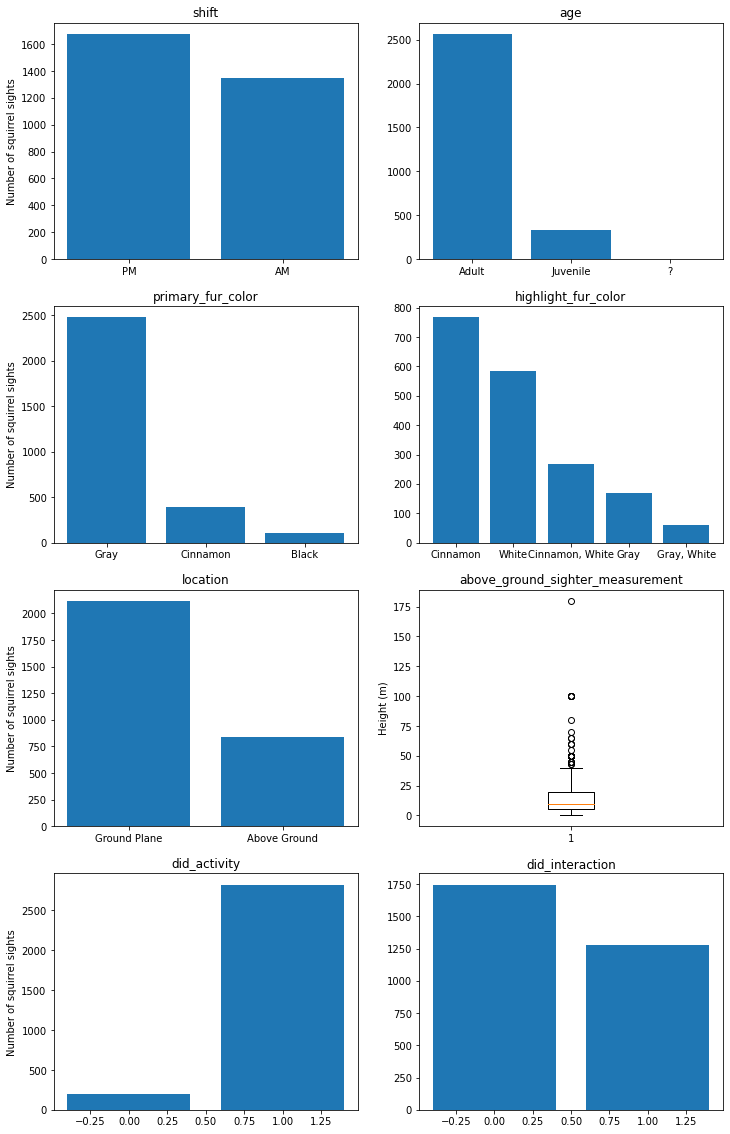

In [13]:
fig,ax = plt.subplots(4,2,figsize=(6*2,5*4))
for i in range(4):
    for j in range(2):
        ax[i,j].set_title(l[i*2+j])
        if l[i*2+j] == 'above_ground_sighter_measurement':
            ax[i,j].boxplot(df[l[i*2+j]].dropna())
            ax[i,j].set_ylabel('Height (m)')
        else:
            ax[i,j].bar(df[l[i*2+j]].value_counts().head().index,df[l[i*2+j]].value_counts().head())
        if(j == 0):
            ax[i,j].set_ylabel('Number of squirrel sights')
plt.show()

In [14]:
corr_df = df[['above_ground_sighter_measurement','did_activity','did_interaction']]

In [15]:
corr_df['is_AM'] = df['shift'].replace('AM',1)
corr_df['is_AM'] = corr_df['is_AM'].replace('PM',0)

corr_df['is_adult'] = df['age'].replace('Adult',1)
corr_df['is_adult'] = corr_df['is_adult'].replace('Juvenile',0)
corr_df['is_adult'] = corr_df['is_adult'].replace('?',np.NaN)

corr_df['color'] = df['primary_fur_color'].replace('Gray',1)
corr_df['color'] = corr_df['color'].replace('Black',0)
corr_df['color'] = corr_df['color'].replace('Cinnamon',2)

corr_df['on_ground'] = df['location'].replace('Ground Plane',1)
corr_df['on_ground'] = corr_df['on_ground'].replace('Above Ground',0)


<ipython-input-15-a640ee1ea643>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  corr_df['is_AM'] = df['shift'].replace('AM',1)
<ipython-input-15-a640ee1ea643>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  corr_df['is_AM'] = corr_df['is_AM'].replace('PM',0)
<ipython-input-15-a640ee1ea643>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pan

<AxesSubplot:>

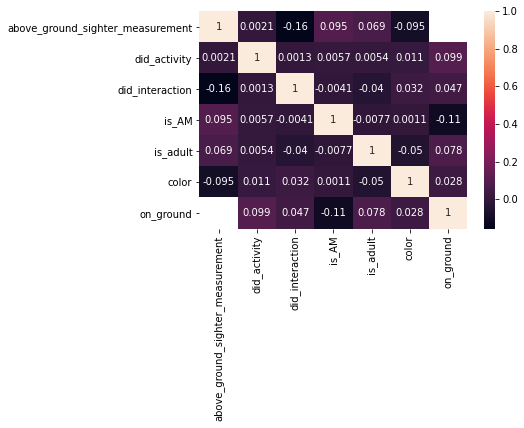

In [16]:
sns.heatmap(corr_df.corr(),annot=True)

## Zaver
* 5 vevericiek bolo patrenych viac krat
* vacsina spatreni sa stalo po obede
* cca 11% vevericiek bolo dospievajucich
* najdominantejsia farba je seda 
* vevericky su spatrene vacsinou na zemi 
* ked uz su nad zemou tak interkvartalne rozpatie je medzi 5 az 20 metrov
* smerodajna odchilka a boxplot naznacuje existenciu outlierov
* viac ako 90% vevericiek robila nejaku aktivitu
* viac vevericiek neinteragovalo s clovekom
* signifikantnejsie korelacie ( absolutna hodnota viac ako 0.1):
  * vyska vevericiek nad zemou a interakcia su zaporne korelovane
  * ci je vevericka na zemi a ci bola vevericka spatrena po obede su zaporne korelovane

# Casovy rad

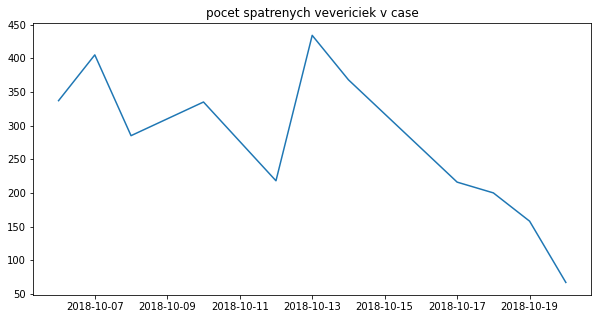

In [17]:
plt.figure(figsize=(10,5))
plt.plot(df.groupby('date')['long'].count())
plt.title('pocet spatrenych vevericiek v case')
plt.show()

In [18]:
y = df.groupby('date')['long'].count().values

In [19]:
X = np.array(range(len(y))).reshape(-1,1)
lr = LinearRegression().fit(X,y)
y_pred = lr.predict(X)
y_notrend = y-y_pred

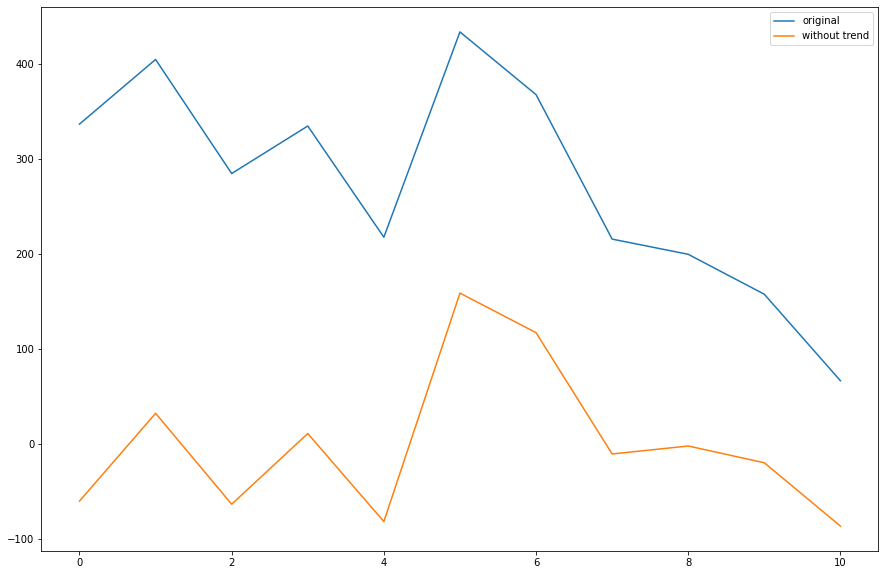

In [20]:
plt.figure(figsize=(15,10))
plt.plot(y,label='original')
plt.plot(y_notrend,label='without trend')
plt.legend()
plt.show()

In [21]:
# autokorelacna funckia
def auto_corr(h:int, y:np.array)->float:
    N = len(y)
    c0 =  (1/N) * np.sum([(i-np.mean(y))**2 for i in y])
    ch = (1/N) * np.sum([ (y[i] - np.mean(y)) * (y[i+h] - np.mean(y)) for i in range(N-h)])
    return ch/c0

In [22]:
y_autocorr = np.array([auto_corr(i+1,y_notrend) for i in range(len(y))])

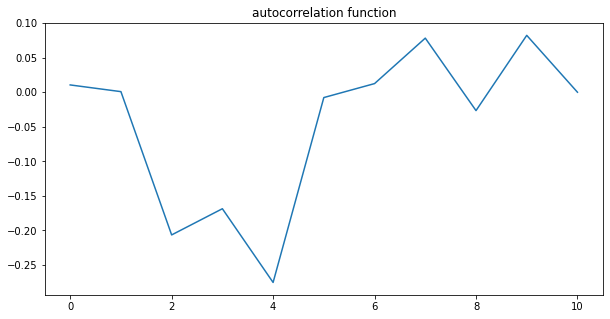

In [23]:
plt.figure(figsize=(10,5))
plt.plot(y_autocorr)
plt.title("autocorrelation function")
plt.show()

In [24]:
power_spec_complex = np.fft.fft(y_autocorr)
conj = np.conj(power_spec_complex)
power_spec = np.real(power_spec_complex * conj)

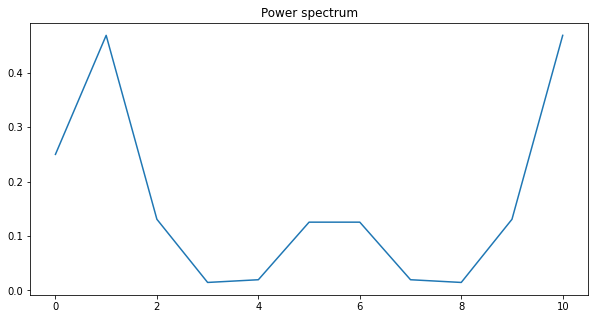

In [25]:
plt.figure(figsize=(10,5))
plt.plot(power_spec)
plt.title("Power spectrum")
plt.show()

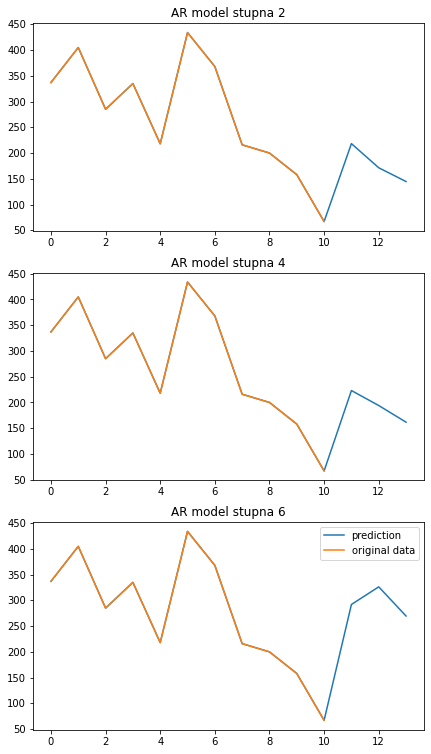

In [26]:
fig, ax = plt.subplots(3,1,figsize=(7,13))

for p in [2,4,6]:
    X = np.zeros((len(y)-p,p))
    Y = np.array([y[i] for i in range(len(y)-1,p-1,-1)])
    for index,i in enumerate(range(len(y)-2,p-2,-1)):
        for index2,j in enumerate(range(i,i-p,-1)):
            X[index,index2] = y[j]
            #print(index,index2,' = ',j,end='    ')
        #print()
    PHI = np.linalg.inv(X.T@X)@X.T@Y

    y_new = np.zeros(int(len(y)*1.3))
    y_new[:len(y)] = y 
    for i in range(len(y),int(len(y)*1.3)):
        y_new[i] = np.array([y_new[j] for j in range(i-1,i-p-1,-1)]) @ PHI

    y_new[:len(y)] = y
    y_new[len(y):] = y_new[len(y):] + lr.predict(np.array([i for i in range(len(y),int(len(y)*1.3))]).reshape(-1,1))

    ax[p//2 -1].plot(y_new,label='prediction')
    ax[p//2 -1].plot(y,label='original data')
    ax[p//2 -1].set_title('AR model stupna ' + str(p))
plt.legend()
plt.show()

## Zaver
* casom pocty spatreni klesali
* predpokladali sme existenciu zaporneho linearneho trendu
* mame malo bodov na ziskanie informacie z spektralneho rozkladu
* skusali sme AR model druheho, stvrteho a siesteho stupna

# Zmena premennych v case

In [27]:
corr_df.loc[:,'date'] = df.loc[:,'date']

c:\Users\Rudolf\AppData\Local\Programs\Python\Python39\lib\site-packages\pandas\core\indexing.py:1597: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = value
c:\Users\Rudolf\AppData\Local\Programs\Python\Python39\lib\site-packages\pandas\core\indexing.py:1676: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(ilocs[0], value, pi)


In [28]:
ts = corr_df.groupby('date').mean()

In [29]:
ts.shape

(11, 7)

In [30]:
np.std(ts)

above_ground_sighter_measurement    4.114475
did_activity                        0.019374
did_interaction                     0.063674
is_AM                               0.106268
is_adult                            0.055792
color                               0.047079
on_ground                           0.053088
dtype: float64

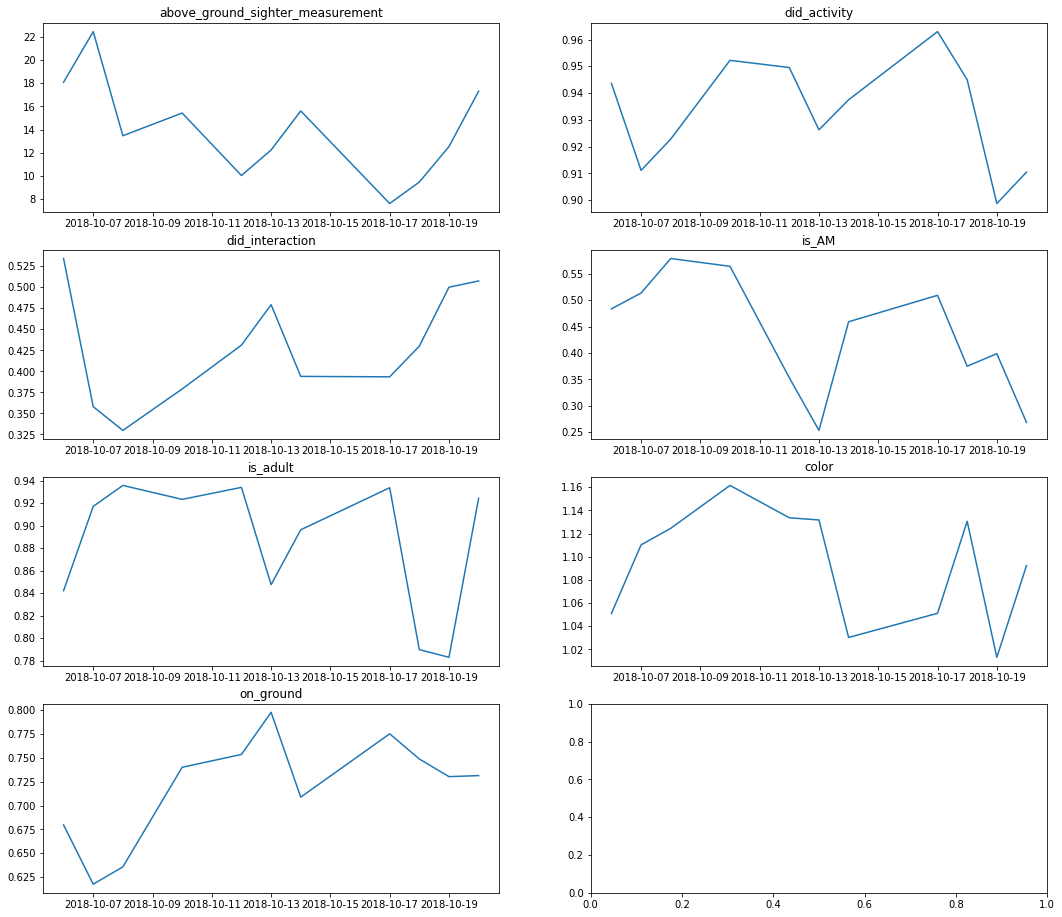

In [31]:
fig, ax = plt.subplots(4,2,figsize=(2*9,4*4))
for i in range(4):
    for j in range(2):
        try:
            ax[i,j].plot(ts[ts.columns[i*2 + j]])
            ax[i,j].set_title(ts.columns[i*2 + j])
        except:
            pass

## Zaver
* najvacsia odchilka z boolovskych premennych ma is_AM
* zo zaciatku boli vevericky spatrene hlavne pred obedom, boli prevazne dospele a mali castejsie skoricovu farbu farbu 
* je mozny linearny trend pri pocte spatrenych veverickach na zemi

# Klasifikator

In [32]:
class NaiveBayes:
    def __init__(self, data:pd.DataFrame):
        self.prob_tables = {}
        self.data = data.copy()
        for col in data.columns:
            self.prob_tables[col] = data[col].value_counts() / len(data[col])
            for index,val in self.prob_tables[col].items():
                if val == 0:
                    self.prob_tables[col][index] = 1e-6

    def predict(self, evidence:dict, target:str):
        new_probs = {}
        for val in self.data[target].unique():
            new_probs[val] = self.prob_tables[target][val]

            for ev in evidence:
                new_probs[val] *= ((self.data.query(f"{ev} == {evidence[ev]} & {target} == {val}").shape[0]/self.data.shape[0])/self.prob_tables[target][val])
        alpha = 1/sum(new_probs.values())
        for val in new_probs:
            new_probs[val] *= alpha
        df = pd.Series(new_probs).sort_index()
        return df.copy()

In [33]:
model = NaiveBayes(corr_df[['did_activity','did_interaction','is_AM','is_adult','color','on_ground']].dropna())

In [34]:
model.prob_tables.keys()

dict_keys(['did_activity', 'did_interaction', 'is_AM', 'is_adult', 'color', 'on_ground'])

In [35]:
model.predict({'did_activity':1,'did_interaction':0,'is_AM':1,'color':1,'on_ground':1},'is_adult')

0.0    0.086276
1.0    0.913724
dtype: float64

In [36]:
model.predict({'did_activity':0,'did_interaction':0,'is_AM':0,'color':1},'on_ground')

0.0    0.394917
1.0    0.605083
dtype: float64

In [37]:
col = 'on_ground'
corr_df[col].value_counts()/np.sum(corr_df[col].value_counts())

1.0    0.715106
0.0    0.284894
Name: on_ground, dtype: float64

## Zaver
* vytvorili sme naivny baysovsky kladifikator
* vysledne rozdelenie pravdepodobnosti je rozdielen od celkoveho rozdelenia -> model ma nejaku informaciu o prostredi

# Heatmapa NYC

In [54]:
df['long'].describe()

count    3023.000000
mean      -73.967184
std         0.007726
min       -73.981159
25%       -73.973102
50%       -73.968594
75%       -73.960189
max       -73.949722
Name: long, dtype: float64

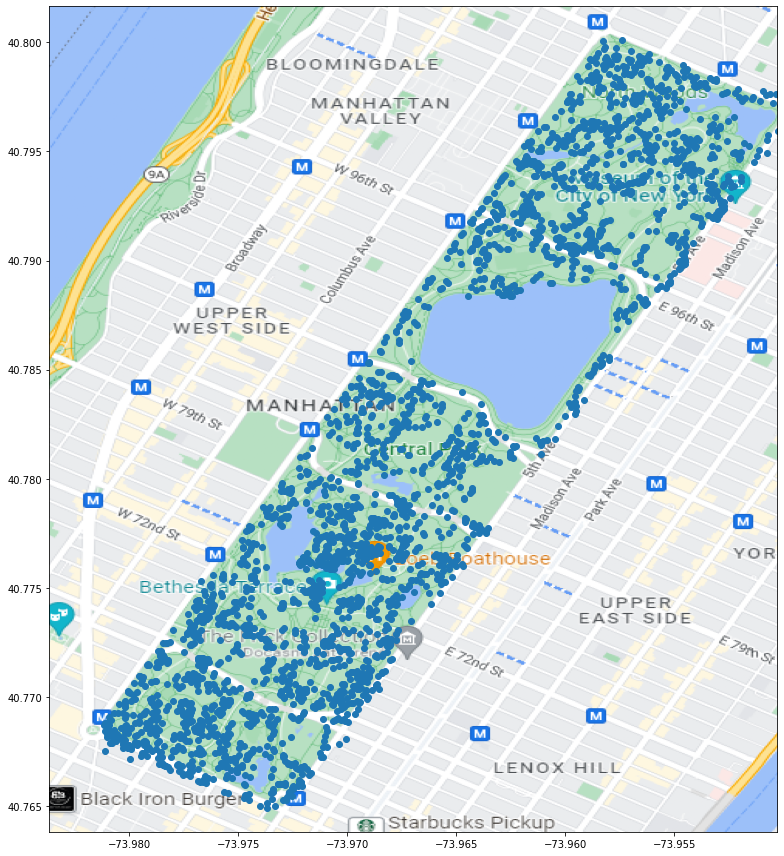

In [61]:
plt.rcParams["figure.figsize"] = [28, 12]
#plt.rcParams["figure.autolayout"] = True
im = plt.imread("map.png")
fig, ax = plt.subplots()
im = ax.imshow(im, extent=[-73.983664, -73.950284, 40.763819, 40.801649])
ax.scatter(df['long'],df['lat'])
#x = np.array(range(300))
#ax.plot(x, x, ls='dotted', linewidth=2, color='red')
plt.show()

In [48]:
df

,long,lat,unique_squirrel_id,shift,date,age,primary_fur_color,highlight_fur_color,location,above_ground_sighter_measurement,did_activity,did_interaction
0,-73.956134,40.794082,37F-PM-1014-03,PM,2018-10-14,NaN,NaN,NaN,NaN,NaN,False,False
1,-73.957044,40.794851,37E-PM-1006-03,PM,2018-10-06,Adult,Gray,Cinnamon,Ground Plane,NaN,True,True
2,-73.976831,40.766718,2E-AM-1010-03,AM,2018-10-10,Adult,Cinnamon,NaN,Above Ground,4.0,True,False
3,-73.975725,40.769703,5D-PM-1018-05,PM,2018-10-18,Juvenile,Gray,NaN,Above Ground,3.0,True,True
4,-73.959313,40.797533,39B-AM-1018-01,AM,2018-10-18,NaN,NaN,NaN,Above Ground,NaN,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...
3018,-73.963943,40.790868,30B-AM-1007-04,AM,2018-10-07,Adult,Gray,NaN,Ground Plane,NaN,True,True
3019,-73.970402,40.782560,19A-PM-1013-05,PM,2018-10-13,Adult,Gray,White,Ground Plane,NaN,True,False
3020,-73.966587,40.783678,22D-PM-1012-07,PM,2018-10-12,Adult,Gray,"Black, Cinnamon, White",Ground Plane,NaN,True,False
3021,-73.963994,40.789915,29B-PM-1010-02,PM,2018-10-10,NaN,Gray,"Cinnamon, White",Ground Plane,NaN,True,False


In [ ]:
40.803311, -73.979604, 40.800887, -73.949817

In [ ]:
40.763819, -73.983664, 40.763912, -73.951645